#This is the main ipynb notebook
based on the py files in /../src_class

# Notes to myself:


# Imports
from `__init__.py`

In [1]:
from google.colab import files, drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import sys

parent_dir = "/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class"
sys.path.append(parent_dir)

import utils
import Cell_Class
import TDL_Class
import UniqueHistory_Class
import read_and_print
import initialize
import ITI


## Reloads

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)
importlib.reload(ITI)


# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *
# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>

# POR 0 - Initialize the TDL slices

In [3]:
TDL1_Z3_2 = TDL_Class.TDL()
TDL1_Z3_2.initialize_TDL(0,1600,2)

[   8    9   10   11   12   13   14   15   32   33   34   35   36   37
   38   39   56   57   58   59   60   61   62   63   80   81   82   83
   84   85   86   87  104  105  106  107  108  109  110  111  128  129
  130  131  132  133  134  135  152  153  154  155  156  157  158  159
  176  177  178  179  180  181  182  183  200  201  202  203  204  205
  206  207  224  225  226  227  228  229  230  231  248  249  250  251
  252  253  254  255  272  273  274  275  276  277  278  279  296  297
  298  299  300  301  302  303  320  321  322  323  324  325  326  327
  344  345  346  347  348  349  350  351  368  369  370  371  372  373
  374  375  392  393  394  395  396  397  398  399  416  417  418  419
  420  421  422  423  440  441  442  443  444  445  446  447  464  465
  466  467  468  469  470  471  488  489  490  491  492  493  494  495
  512  513  514  515  516  517  518  519  536  537  538  539  540  541
  542  543  560  561  562  563  564  565  566  567  584  585  586  587
  588 

#POR 1

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250421/Unsync1_Ch1_Z3_2_POR1.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250421/Unsync1_Ch1_Z3_2_POR1.csv'.

There are 197 tapped bins and 192 untapped = 389 = 389

Tapped is: 50.64% 



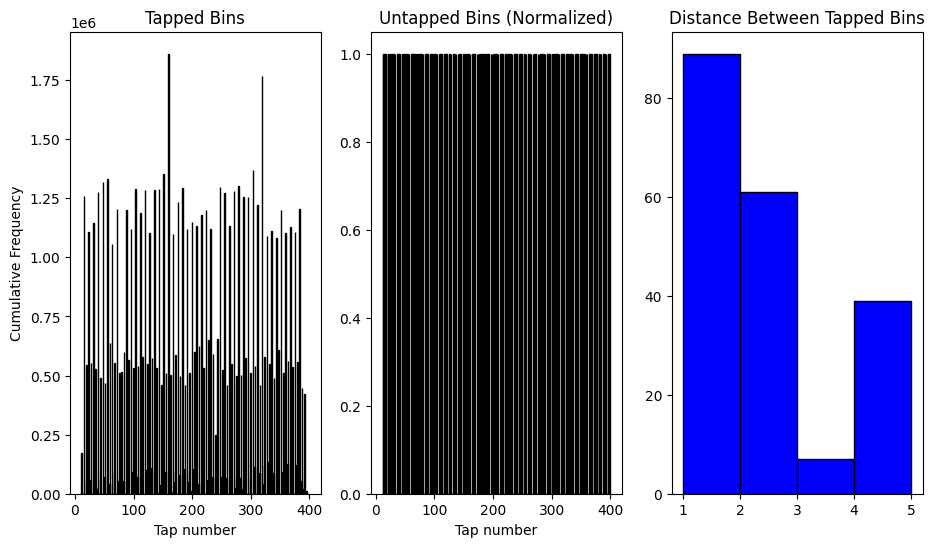

In [4]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250421/Unsync1_Ch1_Z3_2_POR1.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps1, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps1)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps1)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps1) / len(full_range):.2f}% \n")

# Print Taps
bin1, freq1 = read_and_print.print_taps(data, present_taps1, missing_taps)

## 2) Carry out the POR & error lib construction

In [5]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps1} \n")


# Feed to the TDL
TDL1_Z3_2.feed_physical_nums(present_taps1, 1, verbose = True)


# POR
TDL1_Z3_2.perform_POR()
to_print1 = TDL1_Z3_2.get_logical_assignments()
error_lib1 = TDL1_Z3_2.build_initial_error_lib()


Present taps: 
 [ 11  15  18  19  23  26  27  31  33  34  35  37  39  41  42  43  47  50
  51  55  57  58  59  63  66  67  71  73  74  75  79  81  82  83  87  89
  90  91  95  97  98  99 103 105 106 107 111 113 114 115 119 121 122 123
 127 129 130 131 135 137 138 139 141 143 145 146 147 151 153 154 155 159
 161 162 163 165 167 169 170 171 173 175 177 178 179 183 186 187 191 193
 194 195 197 199 201 202 203 207 209 210 211 215 217 218 219 223 225 226
 227 231 233 234 235 239 241 242 243 247 249 250 251 255 257 258 259 263
 265 266 267 269 271 273 274 275 277 279 281 282 283 285 287 289 290 291
 295 298 299 303 305 306 307 311 313 314 315 319 321 322 323 327 329 330
 331 335 337 338 339 343 345 346 347 351 353 354 355 357 359 361 362 363
 367 369 370 371 375 378 379 383 385 386 387 389 391 393 394 395 399] 

Trial 0 data processed and added to unique history. 


--------------------------------------------------------------------------------------------------------
🟡 Running 'get_logical

##3) Results

In [6]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_2.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_2.logical_assignment}")
print(f"{to_print1}")

POR result: 

((np.int64(4), np.int64(8)),):[8, 4, 6, 7, np.int64(5)]
((np.int64(3), np.int64(4), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 5, 7]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]

Logical bin assignment: 

{0: np.int64(8), 1: np.int64(9), 2: np.int64(10), 3: np.int64(11), 4: np.int64(12), 5: np.int64(13), 6: np.int64(14), 7: np.int64(15), 8: np.int64(32), 9: np.int64(33), 10: np.int64(34), 11: np.int64(35), 12: np.int64(36), 13: np.int64(37), 14: np.int64(38), 15: np.int64(39), 16: np.int64(56), 17: np.int64(57), 18: np.int64(58), 19: np.int64(59), 20: np.int64(60), 21: np.int64(61), 22: np.int64(62), 23: np.int64(63), 24: np.int64(80), 25: np.int64(81), 26: np.int64(82), 27: np.int64(83), 28: np.int64(84), 29: np.int64(85), 30: np.int64(86), 31: np.int64(87), 32: np.int64(104), 33: np.int64(105), 34: np.int64(106), 35: np.i

#POR 2

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250421/Unsync1_Ch1_Z3_2_POR2.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250421/Unsync1_Ch1_Z3_2_POR2.csv'.

There are 365 tapped bins and 23 untapped = 388 = 388

Tapped is: 94.07% 



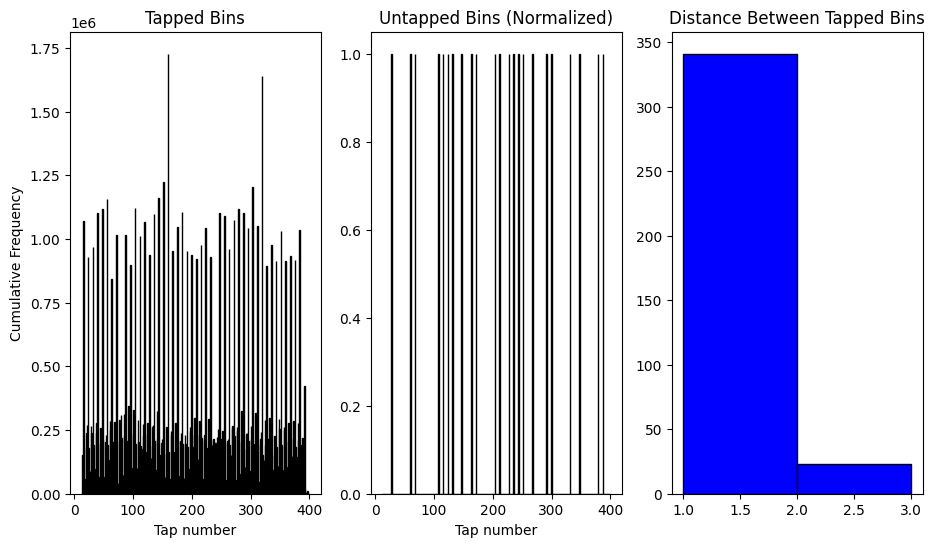

In [7]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250421/Unsync1_Ch1_Z3_2_POR2.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps2, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps2)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps2)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps2) / len(full_range):.2f}% \n")

# Print Taps
bin2, freq2 = read_and_print.print_taps(data, present_taps2, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [8]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps2} \n")


# Feed to the TDL
TDL1_Z3_2.feed_physical_nums(present_taps2, 2)


# POR
error_lib2 = TDL1_Z3_2.next_POR_n_error_lib(error_lib1, 2)
to_print2 = TDL1_Z3_2.get_logical_assignments()

Present taps: 
 [ 12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  28  29  30
  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  60  61  62  63  64  65  66  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 108 109 110 111 112 113 114 116 117 118 119 120 121 122 124 125
 126 127 128 129 130 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 164
 165 166 167 168 169 170 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 204 205 206 207 208 209 210 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 228 229 230 231 232 233 234 236 237 238 239 240 241
 242 244 245 246 247 248 249 250 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 268 269 270 27

##3) Results

In [9]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_2.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_2.logical_assignment}")
print(f"{to_print2}")

POR result: 

((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.i

# POR3

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250421/Unsync1_Ch1_Z3_2_POR3.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250421/Unsync1_Ch1_Z3_2_POR3.csv'.

There are 386 tapped bins and 2 untapped = 388 = 388

Tapped is: 99.48% 



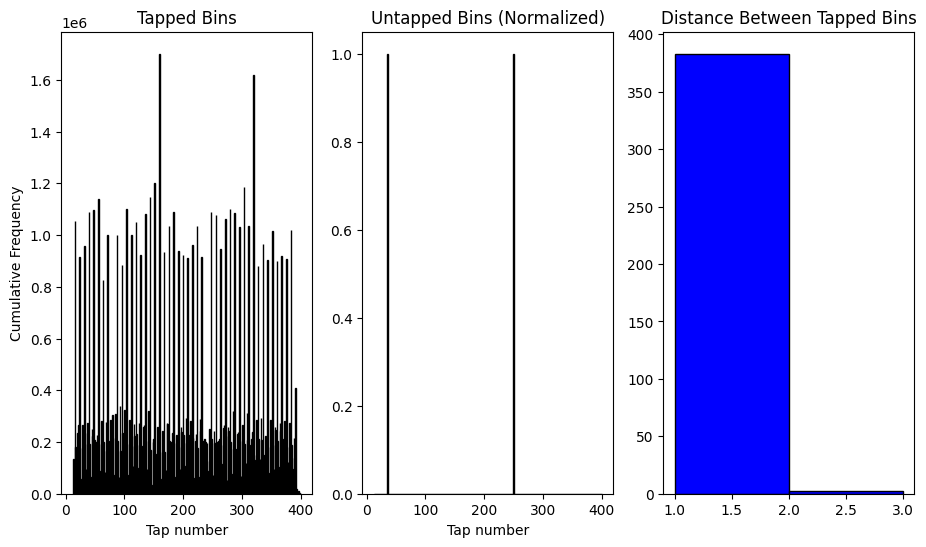

In [10]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250421/Unsync1_Ch1_Z3_2_POR3.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps3, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps3)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps3)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps3) / len(full_range):.2f}% \n")

# Print Taps
bin3, freq3 = read_and_print.print_taps(data, present_taps3, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [ ]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps3} \n")


# Feed to the TDL
TDL1_Z3_1.feed_physical_nums(present_taps3, 3)


# POR
error_lib3 = TDL1_Z3_1.next_POR_n_error_lib(error_lib2, 3)
to_print3 = TDL1_Z3_1.get_logical_assignments()

Present taps: 
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 25

##3) Results

In [ ]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_1.logical_assignment}")
print(f"{to_print3}")

POR result: 



NameError: name 'TDL1_Z3_1' is not defined

# Code Density Test

In [14]:
cdc_width, cdc_to_pass = ITI.get_bin_widths(bin3, freq3, to_print2)

# Save this into a .npz file
np.savez("/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/data/TDL1_Z3_2.npz", cdc_to_pass = cdc_to_pass)

In [15]:
print(cdc_to_pass)

{np.int64(37): np.float64(0.001606488764177421), np.int64(38): np.float64(6.1312791176805685), np.int64(36): np.float64(1.4313814888820822), np.int64(57): np.float64(48.44701936033542), np.int64(58): np.float64(8.285442851405561), np.int64(56): np.float64(1.1333089736087059), np.int64(63): np.float64(2.7485186767916616), np.int64(59): np.float64(0.022261344303601407), np.int64(61): np.float64(10.848435025774219), np.int64(62): np.float64(12.183473088484632), np.int64(60): np.float64(1.7452434937233738), np.int64(81): np.float64(42.09698237265286), np.int64(82): np.float64(8.064068699701913), np.int64(80): np.float64(0.8427181060084986), np.int64(83): np.float64(2.639828236975315), np.int64(87): np.float64(1.344768794653431), np.int64(85): np.float64(12.16056914867536), np.int64(86): np.float64(10.782155889332156), np.int64(84): np.float64(1.0077733516079845), np.int64(105): np.float64(43.92351419784361), np.int64(104): np.float64(8.765553493499727), np.int64(106): np.float64(2.39894672

In [16]:
print(to_print2)

{0: np.int64(8), 1: np.int64(9), 2: np.int64(10), 3: np.int64(11), 4: np.int64(12), 5: np.int64(13), 6: np.int64(14), 7: np.int64(15), 8: np.int64(32), 9: np.int64(33), 10: np.int64(34), 11: np.int64(35), 12: np.int64(39), 13: np.int64(37), 14: np.int64(38), 15: np.int64(36), 16: np.int64(57), 17: np.int64(58), 18: np.int64(56), 19: np.int64(63), 20: np.int64(59), 21: np.int64(61), 22: np.int64(62), 23: np.int64(60), 24: np.int64(81), 25: np.int64(82), 26: np.int64(80), 27: np.int64(83), 28: np.int64(87), 29: np.int64(85), 30: np.int64(86), 31: np.int64(84), 32: np.int64(105), 33: np.int64(104), 34: np.int64(106), 35: np.int64(111), 36: np.int64(107), 37: np.int64(109), 38: np.int64(108), 39: np.int64(110), 40: np.int64(129), 41: np.int64(128), 42: np.int64(130), 43: np.int64(135), 44: np.int64(131), 45: np.int64(133), 46: np.int64(134), 47: np.int64(132), 48: np.int64(153), 49: np.int64(154), 50: np.int64(152), 51: np.int64(159), 52: np.int64(155), 53: np.int64(157), 54: np.int64(158)

In [11]:
print(bin3)
print(present_taps3)
print(freq3)

[ 12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.
  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.
  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.
  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.
  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.
  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.
  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109.
 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123.
 124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137.
 138. 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151.
 152. 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165.
 166. 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179.
 180. 181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193.
 194. 195. 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207.
 208. 

# Endpoint - to print out

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print2, 2)

Type the ID for this txt file (e.g. '25_02_14'): 25_04_21_POR2
The text file has been created in this directory under the name: Bin_sequence_25_04_21_POR2.txt.


In [ ]:
files.download("Bin_sequence_25_04_21_POR2.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_outcome_of_notebook = to_print2
# 안찍힌 tap들 + Ultra-narrow bins crop anyways

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print3, 1)

# Debug Prison

In [ ]:
r1,s,e = utils.split_into_cells(present_taps1, logical_assignment = TDL1_Z3_2.logical_assignment)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r1.items():
  print(f"{i}:{j}")

Starting Cell num: 5, Ending Cell num: 149
5:[np.int64(4), np.int64(8)]
8:[np.int64(3), np.int64(4), np.int64(8)]
11:[np.int64(3), np.int64(4), np.int64(8)]
14:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
17:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
20:[np.int64(3), np.int64(4), np.int64(8)]
23:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
26:[np.int64(3), np.int64(4), np.int64(8)]
29:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
32:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
35:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
38:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
41:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
44:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
47:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
50:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
53:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
56:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
59:

In [ ]:
r2,s,e = utils.split_into_cells(present_taps2, logical_assignment = TDL1_Z3_2.logical_assignment)
print(f"Starting Cell num: {s}. Ending Cell num {e}")

for i,j in r2.items():
  print(f"{i}:{j}")

Starting Cell num: 5. Ending Cell num 149
5:[np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
8:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
11:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
14:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
17:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
20:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
23:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
26:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
29:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
32:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6

In [ ]:
r3,s,e = utils.split_into_cells(present_taps3, logical_assignment = TDL1_Z3_2.logical_assignment)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r3.items():
  print(f"{i}:{j}")

Starting Cell num: 5, Ending Cell num: 149
5:[np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
8:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
11:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
14:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
17:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
20:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
23:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
26:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
29:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
32:[np.int64(1), np.int64(2), np.int64(3), np.int64(

In [ ]:
# Code Density Test
code_density_test = freq3 / np.sum(freq3) * 4000  # time in ps

# As this snippet shows, whats not tapped can be omitted.
print(np.where(freq3 == 0))
print(freq2[np.where(freq3 == 0)] / np.sum(freq2) * 4000)

# for i in code_density_test:
#   print(i)

print(len(np.where(code_density_test < 0.5)[0]))


(array([ 23, 237]),)
[4.52319871e-05 4.52319871e-05]
47


# Reload (same thing)

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)
importlib.reload(ITI)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *
# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>